In [1]:
%matplotlib inline
import numpy as np
import scipy.stats
import scipy.special
import scipy.optimize
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)
np.set_printoptions(formatter={'float_kind': "{:.4f}".format})

In [3]:
def draw(n=30):
    X = np.ones((n, 2))
    X[:,1] = scipy.stats.uniform.rvs(size=n)
    beta = np.array([-1.0, 1.0])
    p = scipy.special.expit(X @ beta)
    y = scipy.stats.bernoulli.rvs(p)
    return X, beta, p, y

def loglike(beta_hat, X, y):
    p_hat = scipy.special.expit(X @ beta_hat)
    return scipy.stats.bernoulli.logpmf(y, p_hat).sum()

def objective(beta_hat, X, y):
    return -loglike(beta_hat, X, y) / len(y)

X, beta, p, y = draw(n=200)

history = []
callback = lambda bk: history.append(bk)
opt = scipy.optimize.minimize(objective, [0.0, 0.0], args=(X, y), method='L-BFGS-B', callback=callback)
history = np.array(history)
opt

      fun: 0.647291742606273
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.0000, 0.0000])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 30
      nit: 9
     njev: 10
   status: 0
  success: True
        x: array([-0.9925, 0.8185])

Text(0, 0.5, '$\\beta_1$')

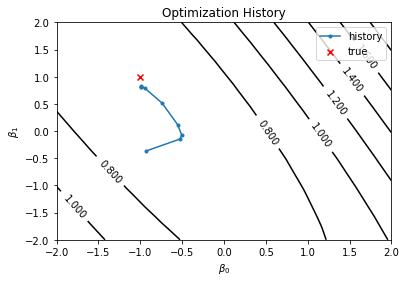

In [4]:
steps = 20
b0 = np.linspace(-2.0, 2.0, steps)
b1 = np.linspace(-2.0, 2.0, steps)
B0, B1 = np.meshgrid(b0, b1)

ll = np.zeros((steps, steps))
for i in range(steps):
    for j in range(steps):
        ll[i][j] = objective([b0[i], b1[j]], X, y)

contour = plt.contour(B0, B1, ll.T, colors='k')
plt.clabel(contour)

plt.plot(history[:,0], history[:,1], '.-', label='history')
plt.scatter([beta[0]], [beta[1]], marker='x', color='red', label='true')
plt.legend()
plt.title('Optimization History')
plt.xlabel('$\\beta_0$')
plt.ylabel('$\\beta_1$')